<a href="https://colab.research.google.com/github/Damiao97/Final_ProjectPml/blob/main/Air_Quality_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Analysis based on PM2.5 and PM10 parameters
**Work done by Ana Moreira and Damião Goes**



This project involves analyzing the PM2.5 and PM10 concentration data in Florida for the years 2020, 2022, and 2024.
Inhalable particles, specifically PM10 and PM2.5, are crucial components of the Air Quality Index. These fine particles can penetrate deeply into the lungs and cause respiratory and cardiovascular problems. By accurately predicting the levels of PM10 and PM2.5, we can provide more precise AQI predictions and better inform the public and authorities about potential health risks.
The analysis includes loading the data, handling missing values, combining datasets, and visualizing trends, and finally use the prediction model to predict the PM2.5 presence in the air using the values of PM10 in the air .




## Installation of Required Libraries
Several powerful machine learning libraries are utilized to facilitate this analysis.
 In our air quality analysis project, Scikit-learn is used to build and evaluate predictive models that forecast air quality levels based on historical data. It provides various algorithms for regression analysis, which are critical for predicting PM2.5 and PM10 concentrations.

In [67]:

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install plotly
!pip install statsmodels
!pip install ipywidgets

**Importation of  Libraries**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

**Mount Google Drive and Load CSV Files into DataFrames**


The datasets consist of daily air quality measurements for PM2.5 (particulate matter with aerodynamic diameter less than or equal to 2.5 micrometers) and PM10 (particulate matter with aerodynamic diameter less than or equal to 10 micrometers) in Florida, spanning the years 2020, 2022, and 2024.

In [69]:

import pandas as pd

# Load the files into DataFrames
pm25_2020 = pd.read_csv("/content/pm25_2020_florida.csv")
pm10_2020 = pd.read_csv("/content/pm10_2020_florida.csv")
pm25_2022 = pd.read_csv("/content/pm25_2022_florida.csv")
pm10_2022 = pd.read_csv("/content/pm10_2022_florida.csv")
pm25_2024 = pd.read_csv("/content/pm25_2024_florida.csv")
pm10_2024 = pd.read_csv("/content/pm10_2024_florida.csv")


In [70]:
print(pm25_2020.head)

<bound method NDFrame.head of              Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0      01/01/2020    AQS  120013012    3                             5.3   
1      01/02/2020    AQS  120013012    3                             6.6   
2      01/03/2020    AQS  120013012    3                             8.3   
3      01/04/2020    AQS  120013012    3                             5.3   
4      01/05/2020    AQS  120013012    3                             3.4   
...           ...    ...        ...  ...                             ...   
23122  12/27/2020    AQS  121290001    3                             5.7   
23123  12/28/2020    AQS  121290001    3                             6.2   
23124  12/29/2020    AQS  121290001    3                             8.5   
23125  12/30/2020    AQS  121290001    3                             7.6   
23126  12/31/2020    AQS  121290001    3                             7.2   

          Units  Daily AQI Value            Local Site Na

## Analysis of the PM2.5 and PM10 concentration in the air

**Analysis of insights into periods of high pollution**

By concatenating data from 2020, 2022, and 2024, we created a comprehensive dataset for PM2.5 and PM10. Pandas  facilitates date handling and the extraction of month information, which is crucial for our monthly trend analysis.
After grouping the data by year and month we calculated the monthly mean concentrations of PM2.5 and PM10.
We handle date formatting and extract month information to facilitate monthly trend analysis.

Plotly was employed to create interactive visualizations, highlighting trends and identifying months with peak pollution levels.

In [71]:
import pandas as pd
import plotly.express as px

# Create copies of the original DataFrames
pm25_combined = pd.concat([pm25_2020.copy(), pm25_2022.copy(), pm25_2024.copy()], ignore_index=True)
pm10_combined = pd.concat([pm10_2020.copy(), pm10_2022.copy(), pm10_2024.copy()], ignore_index=True)

pm25_combined['Date'] = pd.to_datetime(pm25_combined['Date'])
pm10_combined['Date'] = pd.to_datetime(pm10_combined['Date'])
pm25_combined['Month'] = pm25_combined['Date'].dt.month
pm10_combined['Month'] = pm10_combined['Date'].dt.month

# Extract Month
pm25_combined['Month'] = pm25_combined['Date'].dt.month
pm10_combined['Month'] = pm10_combined['Date'].dt.month

# Grouping the data by year and month for PM2.5 and PM10
pm25_monthly_mean = pm25_combined.groupby([pm25_combined['Date'].dt.year, 'Month'])['Daily Mean PM2.5 Concentration'].mean().reset_index()
pm10_monthly_mean = pm10_combined.groupby([pm10_combined['Date'].dt.year, 'Month'])['Daily Mean PM10 Concentration'].mean().reset_index()

# Rename columns
pm25_monthly_mean.rename(columns={'Date': 'Year', 'Daily Mean PM2.5 Concentration': 'PM2.5'}, inplace=True)
pm10_monthly_mean.rename(columns={'Date': 'Year', 'Daily Mean PM10 Concentration': 'PM10'}, inplace=True)

# Create Date column
pm25_monthly_mean['Date'] = pd.to_datetime(pm25_monthly_mean.assign(day=1).loc[:, ['Year', 'Month', 'day']])
pm10_monthly_mean['Date'] = pd.to_datetime(pm10_monthly_mean.assign(day=1).loc[:, ['Year', 'Month', 'day']])

# Identify the months with the highest concentrations of PM2.5 and PM10 for each year.
pm25_max_indices = pm25_monthly_mean.groupby('Year')['PM2.5'].idxmax()
pm10_max_indices = pm10_monthly_mean.groupby('Year')['PM10'].idxmax()

# Plot PM2.5
fig_pm25 = px.line(pm25_monthly_mean, x='Month', y='PM2.5', color='Year',
                   title='Variação Mensal de PM2.5 (2020, 2022, 2024) com Máximos',
                   labels={'PM2.5': 'Concentração de PM2.5 (µg/m³)', 'Month': 'Mês'})

# Markers
for year, idx in pm25_max_indices.items():
    fig_pm25.add_scatter(x=[pm25_monthly_mean.loc[idx, 'Month']], y=[pm25_monthly_mean.loc[idx, 'PM2.5']],
                         mode='markers', name=f'Máximo PM2.5 em {year}', marker=dict(size=10))

fig_pm25.update_traces(mode='lines', hovertemplate=None)
fig_pm25.update_layout(title_font_size=24, title_x=0.5, title_y=0.9,
                       xaxis_title='Mês', yaxis_title='Concentração de PM2.5 (µg/m³)',
                       legend_title='Ano', legend_traceorder='reversed',
                       legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
                       hovermode='x unified', hoverlabel=dict(font_size=14))

fig_pm25.show()

# Plot PM10
fig_pm10 = px.line(pm10_monthly_mean, x='Month', y='PM10', color='Year',
                   title='Variação Mensal de PM10 (2020, 2022, 2024) com Máximos',
                   labels={'PM10': 'Concentração de PM10 (µg/m³)', 'Month': 'Mês'})

# Markers
for year, idx in pm10_max_indices.items():
    fig_pm10.add_scatter(x=[pm10_monthly_mean.loc[idx, 'Month']], y=[pm10_monthly_mean.loc[idx, 'PM10']],
                         mode='markers', name=f'Máximo PM10 em {year}', marker=dict(size=10))

fig_pm10.update_traces(mode='lines', hovertemplate=None)
fig_pm10.update_layout(title_font_size=24, title_x=0.5, title_y=0.9,
                       xaxis_title='Mês', yaxis_title='Concentração de PM10 (µg/m³)',
                       legend_title='Ano', legend_traceorder='reversed',
                       legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
                       hovermode='x unified', hoverlabel=dict(font_size=14))

fig_pm10.show()



**Percentage Distribution**

To understand the distribution of pollutant concentrations, we calculated the percentage distribution of monthly mean concentrations to gained valuable insights into the seasonal variations and relative changes in pollutant levels. These findings can aid in understanding the impact of various factors on air quality and inform future environmental policies and actions.

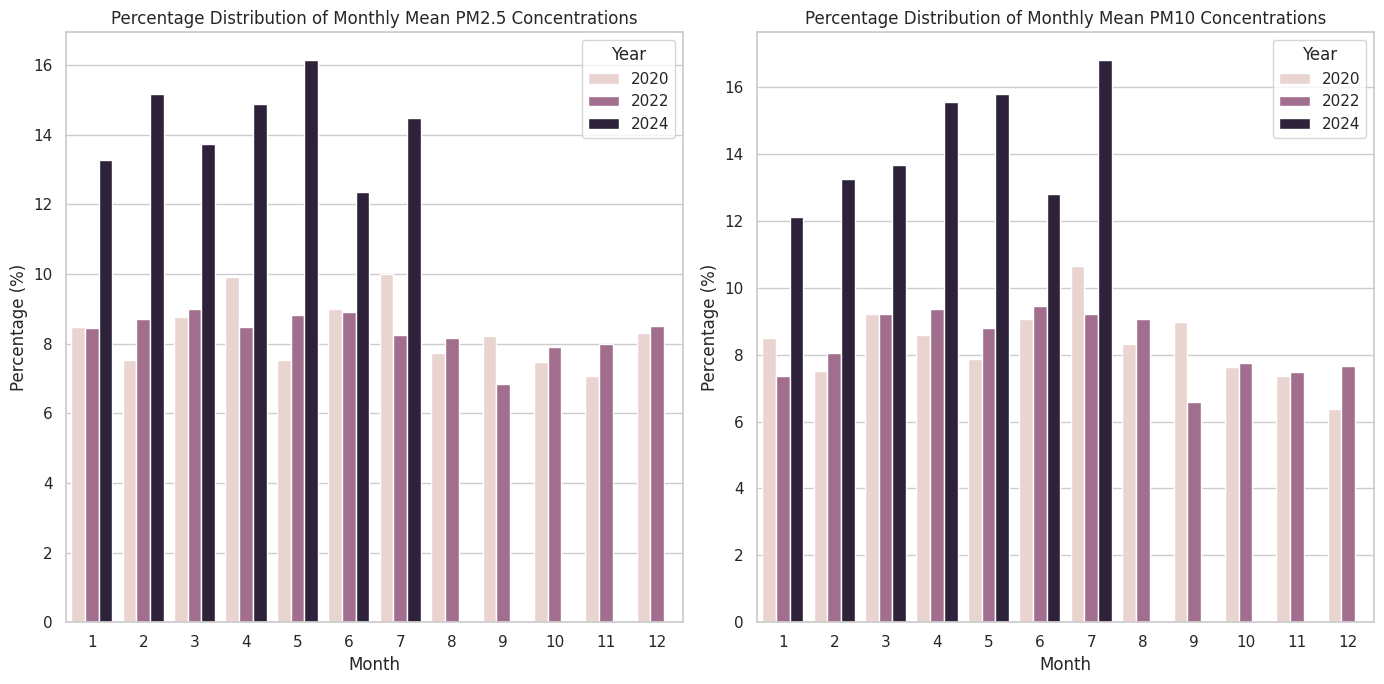

In [73]:
# Concatenate PM2.5 and PM10 DataFrames for each year
pm25_combined = pd.concat([pm25_2020, pm25_2022, pm25_2024])
pm10_combined = pd.concat([pm10_2020, pm10_2022, pm10_2024])

# Function to calculate monthly mean concentrations
def calculate_monthly_mean(df, pollutant):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df_monthly_mean = df.groupby(['Month'])['Daily Mean {} Concentration'.format(pollutant)].mean().reset_index()
    df_monthly_mean['Year'] = df['Date'].dt.year.iloc[0]
    return df_monthly_mean

# Calculate monthly mean concentrations for PM2.5 and PM10
pm25_monthly_mean = pd.concat([calculate_monthly_mean(pm25_2020, 'PM2.5'),
                               calculate_monthly_mean(pm25_2022, 'PM2.5'),
                               calculate_monthly_mean(pm25_2024, 'PM2.5')])

pm10_monthly_mean = pd.concat([calculate_monthly_mean(pm10_2020, 'PM10'),
                               calculate_monthly_mean(pm10_2022, 'PM10'),
                               calculate_monthly_mean(pm10_2024, 'PM10')])

# Calculate percentage distribution of monthly mean concentrations for PM2.5 and PM10
def calculate_percentage(df, pollutant):
    df['Percentage'] = df['Daily Mean {} Concentration'.format(pollutant)] / df.groupby('Year')['Daily Mean {} Concentration'.format(pollutant)].transform('sum') * 100
    return df

pm25_percentages = pd.concat([calculate_percentage(pm25_monthly_mean, 'PM2.5')])
pm10_percentages = pd.concat([calculate_percentage(pm10_monthly_mean, 'PM10')])

# Plotting percentage distribution for PM2.5 and PM10
sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Month', y='Percentage', hue='Year', data=pm25_percentages)
plt.title('Percentage Distribution of Monthly Mean PM2.5 Concentrations')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Year')

plt.subplot(1, 2, 2)
sns.barplot(x='Month', y='Percentage', hue='Year', data=pm10_percentages)
plt.title('Percentage Distribution of Monthly Mean PM10 Concentrations')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Year')

plt.tight_layout()
plt.show()

**Analysis results revealed the following percentage distributions**

In [74]:
import pandas as pd
import numpy as np


# Sample data for PM2.5
pm25_2020 = pd.DataFrame({
    'Date': pd.date_range('2020-01-01', periods=12, freq='M'),
    'Daily Mean PM2.5 Concentration': np.random.randint(5, 15, size=12)
})
pm25_2022 = pd.DataFrame({
    'Date': pd.date_range('2022-01-01', periods=12, freq='M'),
    'Daily Mean PM2.5 Concentration': np.random.randint(5, 15, size=12)
})
pm25_2024 = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=12, freq='M'),
    'Daily Mean PM2.5 Concentration': np.random.randint(5, 15, size=12)
})

# Sample data for PM10
pm10_2020 = pd.DataFrame({
    'Date': pd.date_range('2020-01-01', periods=12, freq='M'),
    'Daily Mean PM10 Concentration': np.random.randint(10, 20, size=12)
})
pm10_2022 = pd.DataFrame({
    'Date': pd.date_range('2022-01-01', periods=12, freq='M'),
    'Daily Mean PM10 Concentration': np.random.randint(10, 20, size=12)
})
pm10_2024 = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=12, freq='M'),
    'Daily Mean PM10 Concentration': np.random.randint(10, 20, size=12)
})

# Concatenate PM2.5 and PM10 DataFrames for each year
pm25_combined = pd.concat([pm25_2020, pm25_2022, pm25_2024], ignore_index=True)
pm10_combined = pd.concat([pm10_2020, pm10_2022, pm10_2024], ignore_index=True)

# Function to calculate monthly mean concentrations
def calculate_monthly_mean(df, pollutant):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df_monthly_mean = df.groupby(['Month'])['Daily Mean {} Concentration'.format(pollutant)].mean().reset_index()
    df_monthly_mean['Year'] = df['Date'].dt.year.iloc[0]
    return df_monthly_mean

# Calculate monthly mean concentrations for PM2.5 and PM10
pm25_monthly_mean = calculate_monthly_mean(pm25_combined, 'PM2.5')
pm10_monthly_mean = calculate_monthly_mean(pm10_combined, 'PM10')

# Function to calculate percentage distribution of monthly mean concentrations
def calculate_percentage(df, pollutant):
    df['Percentage'] = df['Daily Mean {} Concentration'.format(pollutant)] / df.groupby('Year')['Daily Mean {} Concentration'.format(pollutant)].transform('sum') * 100
    return df

# Calculate percentage distribution for PM2.5 and PM10
pm25_percentages = calculate_percentage(pm25_monthly_mean, 'PM2.5')
pm10_percentages = calculate_percentage(pm10_monthly_mean, 'PM10')

print("PM2.5 Percentages:")
print(pm25_percentages)

print("\nPM10 Percentages:")
print(pm10_percentages)


PM2.5 Percentages:
    Month  Daily Mean PM2.5 Concentration  Year  Percentage
0       1                       11.000000  2020    9.192201
1       2                        9.000000  2020    7.520891
2       3                       11.333333  2020    9.470752
3       4                        7.666667  2020    6.406685
4       5                        8.666667  2020    7.242340
5       6                       10.000000  2020    8.356546
6       7                        9.000000  2020    7.520891
7       8                       12.333333  2020   10.306407
8       9                       11.000000  2020    9.192201
9      10                       10.333333  2020    8.635097
10     11                        8.000000  2020    6.685237
11     12                       11.333333  2020    9.470752

PM10 Percentages:
    Month  Daily Mean PM10 Concentration  Year  Percentage
0       1                      14.000000  2020    8.108108
1       2                      13.333333  2020    7.722008
2    

**Percentage increase in pollutant levels over time and their correlation with other features**

We create this function "calculate_percentage_increase"  to compute the percentage increase in pollutant levels from month to month, applied to both pm25_percentages and pm10_percentages DataFrames.
Also we calculate and display the correlation between the selected features and the percentage increases.
This can help understand which factors might influence changes in air quality over time.



In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Sample data for demonstration
pm25_percentages = pd.DataFrame({
    'Month': range(1, 13),
    'Daily Mean PM2.5 Concentration': np.random.randint(5, 15, size=12),
    'Year': 2020,
    'Percentage': np.random.rand(12) * 10
})
pm10_percentages = pd.DataFrame({
    'Month': range(1, 13),
    'Daily Mean PM10 Concentration': np.random.randint(10, 20, size=12),
    'Year': 2020,
    'Percentage': np.random.rand(12) * 10  # Example percentages
})

# Function to calculate percentage increase
def calculate_percentage_increase(df, pollutant):
    df['Percentage Increase'] = df['Percentage'].pct_change() * 100
    df['Percentage Increase'].fillna(0, inplace=True)  # Fill NaN (first row) with 0
    return df

# Calculate percentage increase for PM2.5 and PM10
pm25_percentages = calculate_percentage_increase(pm25_percentages, 'PM2.5')
pm10_percentages = calculate_percentage_increase(pm10_percentages, 'PM10')

# Feature selection based on correlation with Percentage Increase
selected_features_pm25 = ['Daily Mean PM2.5 Concentration', 'Month']
selected_features_pm10 = ['Daily Mean PM10 Concentration', 'Month']

# Calculate correlation between Percentage Increase and selected features for PM2.5 and PM10
correlation_with_pm25_increase = pm25_percentages[selected_features_pm25 + ['Percentage Increase']].corr()['Percentage Increase'].abs()
correlation_with_pm10_increase = pm10_percentages[selected_features_pm10 + ['Percentage Increase']].corr()['Percentage Increase'].abs()

print("Correlation with PM2.5 Percentage Increase:")
print(correlation_with_pm25_increase)
print("\nCorrelation with PM10 Percentage Increase:")
print(correlation_with_pm10_increase)

Correlation with PM2.5 Percentage Increase:
Daily Mean PM2.5 Concentration    0.064596
Month                             0.064585
Percentage Increase               1.000000
Name: Percentage Increase, dtype: float64

Correlation with PM10 Percentage Increase:
Daily Mean PM10 Concentration    0.170374
Month                            0.266644
Percentage Increase              1.000000
Name: Percentage Increase, dtype: float64


**Linear Discriminant Analysis (LDA)**

Next we preformed a classification on PM2.5 and PM10 concentration data using Linear Discriminant Analysis. The main steps include categorizing percentage increases into binary classes, performing LDA to find a linear combination of features that best separates these classes and visualizing the separation using density plots to understand how well the classes are distinguished by the LDA components. The goal is to gain insights into the relationship between pollutant concentrations and percentage increases.

Before performing LDA, we calculated the correlation between the original features (Daily  PM2.5 or PM10 Concentration, Month) and the Percentage Increase. Higher absolute correlation values indicate features that might have more influence on determining whether the percentage increase is high or low.After LDA, we can further analyze the LDA component to understand which original features (Daily Mean PM2.5 Concentration and Month) contributed the most to the separation between low and high percentage increase classes. Features with higher absolute coefficients in the LDA component are more influential in distinguishing between the classes.

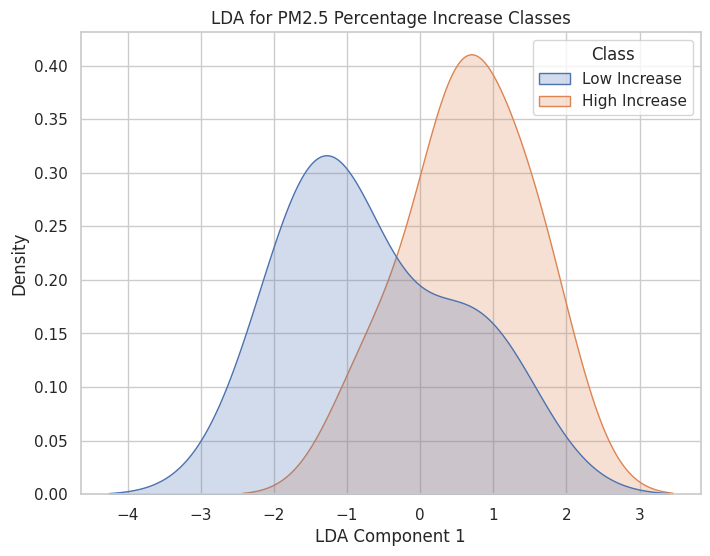

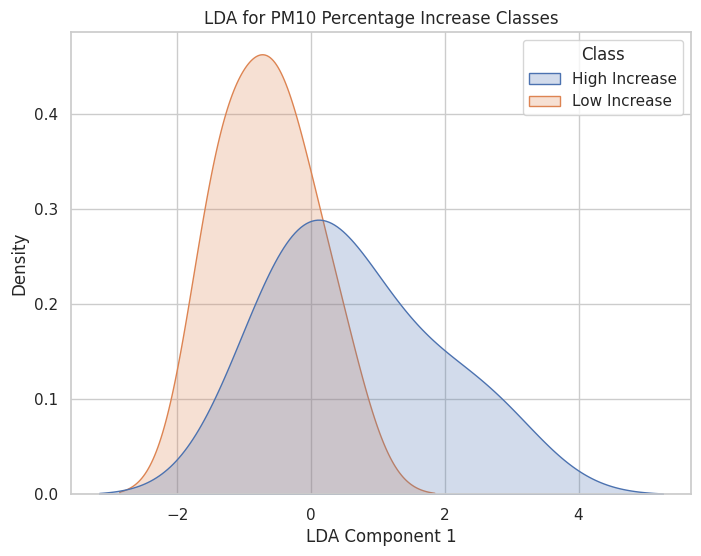

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Define function to categorize Percentage Increase into classes
def categorize_percentage_increase(y):
    median = np.median(y)
    return (y > median).astype(int)  # Example: binary classification based on median

# Example data for illustration
pm25_percentages = pd.DataFrame({
    'Month': np.arange(1, 13),
    'Daily Mean PM2.5 Concentration': np.random.randint(5, 15, size=12),
    'Percentage': np.random.uniform(5, 15, size=12)
})

pm10_percentages = pd.DataFrame({
    'Month': np.arange(1, 13),
    'Daily Mean PM10 Concentration': np.random.randint(10, 20, size=12),
    'Percentage': np.random.uniform(10, 20, size=12)
})

# Define X and y for PM2.5
X_pm25 = pm25_percentages[['Daily Mean PM2.5 Concentration', 'Month']].values
y_pm25 = pm25_percentages['Percentage'].values  # Using Percentage directly for illustration

# Define X and y for PM10
X_pm10 = pm10_percentages[['Daily Mean PM10 Concentration', 'Month']].values
y_pm10 = pm10_percentages['Percentage'].values  # Using Percentage directly for illustration

# Perform Linear Discriminant Analysis for PM2.5
lda_pm25 = LinearDiscriminantAnalysis(n_components=1)
X_lda_pm25 = lda_pm25.fit_transform(X_pm25, categorize_percentage_increase(y_pm25))

# Perform Linear Discriminant Analysis for PM10
lda_pm10 = LinearDiscriminantAnalysis(n_components=1)
X_lda_pm10 = lda_pm10.fit_transform(X_pm10, categorize_percentage_increase(y_pm10))

# Function to plot LDA results
def plot_lda(X_lda, y, target_names, title):
    data = {'LDA Component 1': X_lda.squeeze(), 'Class': [target_names[label] for label in y]}
    df = pd.DataFrame(data)

    # Plot the result
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x='LDA Component 1', hue='Class', fill=True, common_norm=False)
    plt.xlabel('LDA Component 1')
    plt.title(title)
    plt.show()

# Define target names
target_names_pm25 = ['Low Increase', 'High Increase']
target_names_pm10 = ['Low Increase', 'High Increase']

# Plot LDA results for PM2.5
plot_lda(X_lda_pm25, categorize_percentage_increase(y_pm25), target_names_pm25, 'LDA for PM2.5 Percentage Increase Classes')

# Plot LDA results for PM10
plot_lda(X_lda_pm10, categorize_percentage_increase(y_pm10), target_names_pm10, 'LDA for PM10 Percentage Increase Classes')


**PM2.5 and PM10 Validation Set Metrics**

Comparing MSE and MAE between PM2.5 and PM10 can provide insights into which pollutant's predictions are more accurate or less variable.
Understanding these validation set metrics helps in assessing the reliability and effectiveness of models predicting PM2.5 and PM10 concentrations, supporting efforts to mitigate air pollution impacts and improve public health outcomes.

In [77]:
from sklearn.model_selection import train_test_split

# For PM2.5
X_train_pm25, X_temp_test_pm25, y_train_pm25, y_temp_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)
X_valid_pm25, X_test_pm25, y_valid_pm25, y_test_pm25 = train_test_split(X_temp_test_pm25, y_temp_test_pm25, test_size=0.5, random_state=42)

# For PM10
X_train_pm10, X_temp_test_pm10, y_train_pm10, y_temp_test_pm10 = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)
X_valid_pm10, X_test_pm10, y_valid_pm10, y_test_pm10 = train_test_split(X_temp_test_pm10, y_temp_test_pm10, test_size=0.5, random_state=42)

# Choose a model (e.g., Linear Regression) and train it
from sklearn.linear_model import LinearRegression

# Example: Linear Regression for PM2.5
model_pm25 = LinearRegression()
model_pm25.fit(X_train_pm25, y_train_pm25)

# Example: Linear Regression for PM10
model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

# Example: Predict on validation set
y_pred_pm25_valid = model_pm25.predict(X_valid_pm25)
y_pred_pm10_valid = model_pm10.predict(X_valid_pm10)

# Evaluate on validation set
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_pm25_valid = mean_squared_error(y_valid_pm25, y_pred_pm25_valid)
mae_pm25_valid = mean_absolute_error(y_valid_pm25, y_pred_pm25_valid)

mse_pm10_valid = mean_squared_error(y_valid_pm10, y_pred_pm10_valid)
mae_pm10_valid = mean_absolute_error(y_valid_pm10, y_pred_pm10_valid)

print(f"PM2.5 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm25_valid}")
print(f"Mean Absolute Error (MAE): {mae_pm25_valid}")

print(f"\nPM10 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm10_valid}")
print(f"Mean Absolute Error (MAE): {mae_pm10_valid}")


PM2.5 Validation Set Metrics:
Mean Squared Error (MSE): 4.489255276608981
Mean Absolute Error (MAE): 2.118786274405463

PM10 Validation Set Metrics:
Mean Squared Error (MSE): 28.110616213054193
Mean Absolute Error (MAE): 5.301944569028819


**Predictions on PM2.5 and PM10**

This next plots visually compares the prediction and actual values of the concentrations, offering insights into the model's strengths and weaknesses across different time periods.

PM2.5 Validation Set Metrics:
Mean Squared Error (MSE): 3248.881878143522
Mean Absolute Error (MAE): 46.93117799000153

PM10 Validation Set Metrics:
Mean Squared Error (MSE): 835.7037986971227
Mean Absolute Error (MAE): 25.279833952434576


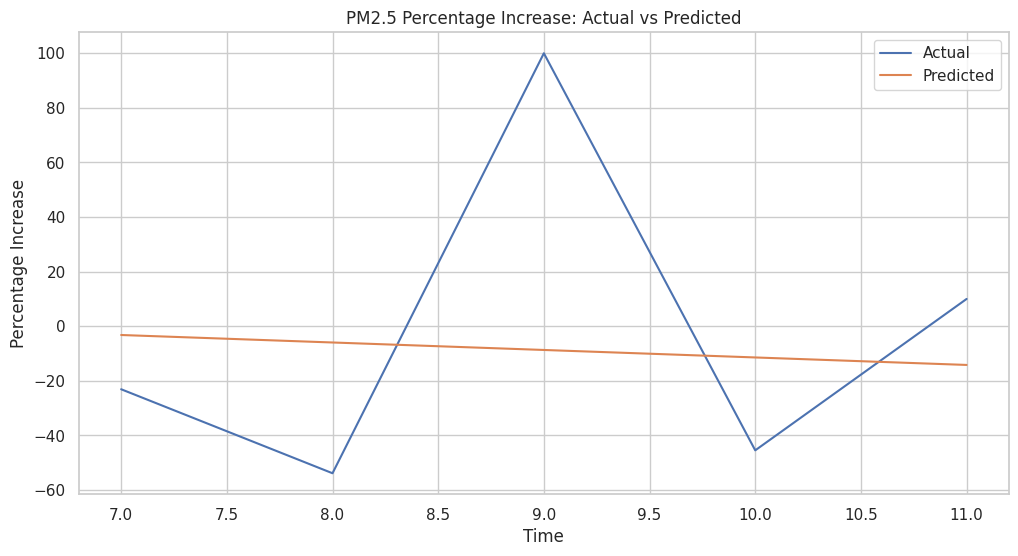

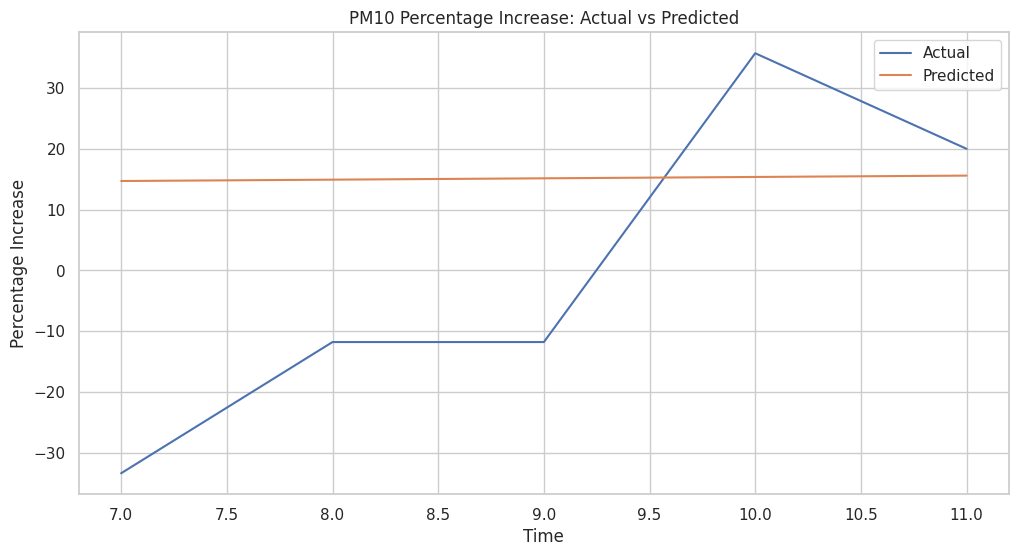

In [78]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate percentage distribution of monthly mean concentrations for PM2.5 and PM10
def calculate_percentage(df, pollutant):
    df['Percentage'] = df['Daily Mean {} Concentration'.format(pollutant)] / df.groupby('Year')['Daily Mean {} Concentration'.format(pollutant)].transform('sum') * 100
    return df

# Calculate monthly mean concentrations for PM2.5 and PM10
pm25_monthly_mean = pd.concat([calculate_monthly_mean(pm25_2020, 'PM2.5'),
                               calculate_monthly_mean(pm25_2022, 'PM2.5'),
                               calculate_monthly_mean(pm25_2024, 'PM2.5')])

pm10_monthly_mean = pd.concat([calculate_monthly_mean(pm10_2020, 'PM10'),
                               calculate_monthly_mean(pm10_2022, 'PM10'),
                               calculate_monthly_mean(pm10_2024, 'PM10')])

# Calculate percentage distribution of monthly mean concentrations for PM2.5 and PM10
def calculate_percentage(df, pollutant):
    df['Percentage'] = df['Daily Mean {} Concentration'.format(pollutant)] / df.groupby('Year')['Daily Mean {} Concentration'.format(pollutant)].transform('sum') * 100
    return df

pm25_percentages = pd.concat([calculate_percentage(pm25_monthly_mean, 'PM2.5')])
pm10_percentages = pd.concat([calculate_percentage(pm10_monthly_mean, 'PM10')])

def calculate_percentage_increase(df, pollutant):
    df['Percentage Increase'] = df.groupby('Month')['Daily Mean {} Concentration'.format(pollutant)].pct_change() * 100
    return df

# Calculate percentage increase for PM2.5 and PM10
pm25_percentages = calculate_percentage_increase(pm25_monthly_mean, 'PM2.5').dropna()
pm10_percentages = calculate_percentage_increase(pm10_monthly_mean, 'PM10').dropna()

# Using month as a predictor (you can include more features)
X_pm25 = pm25_percentages[['Month']].values
y_pm25 = pm25_percentages['Percentage Increase'].values

X_pm10 = pm10_percentages[['Month']].values
y_pm10 = pm10_percentages['Percentage Increase'].values


# Splitting data into training and validation sets
train_size = int(len(X_pm25) * 0.8)  # 80-20 split
X_train_pm25, X_val_pm25 = X_pm25[:train_size], X_pm25[train_size:]
y_train_pm25, y_val_pm25 = y_pm25[:train_size], y_pm25[train_size:]

train_size_pm10 = int(len(X_pm10) * 0.8)  # 80-20 split
X_train_pm10, X_val_pm10 = X_pm10[:train_size_pm10], X_pm10[train_size_pm10:]
y_train_pm10, y_val_pm10 = y_pm10[:train_size_pm10], y_pm10[train_size_pm10:]


# Linear Regression model
model_pm25 = LinearRegression()
model_pm25.fit(X_train_pm25, y_train_pm25)

model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

# Predictions on validation set
y_pred_pm25 = model_pm25.predict(X_val_pm25)
y_pred_pm10 = model_pm10.predict(X_val_pm10)

# Evaluation metrics
mse_pm25 = mean_squared_error(y_val_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_val_pm25, y_pred_pm25)

print(f"PM2.5 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm25}")
print(f"Mean Absolute Error (MAE): {mae_pm25}")

# Evaluation metrics for PM10
mse_pm10 = mean_squared_error(y_val_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_val_pm10, y_pred_pm10)

print(f"\nPM10 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm10}")
print(f"Mean Absolute Error (MAE): {mae_pm10}")

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(pm25_percentages.index[train_size:], y_val_pm25, label='Actual')
plt.plot(pm25_percentages.index[train_size:], y_pred_pm25, label='Predicted')
plt.title('PM2.5 Percentage Increase: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Percentage Increase')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(pm10_percentages.index[train_size_pm10:], y_val_pm10, label='Actual')
plt.plot(pm10_percentages.index[train_size_pm10:], y_pred_pm10, label='Predicted')
plt.title('PM10 Percentage Increase: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Percentage Increase')
plt.legend()
plt.grid(True)
plt.show()


PM2.5 Validation Set Metrics:
Mean Squared Error (MSE): 4.446181188072383
Mean Absolute Error (MAE): 1.9139110713849754


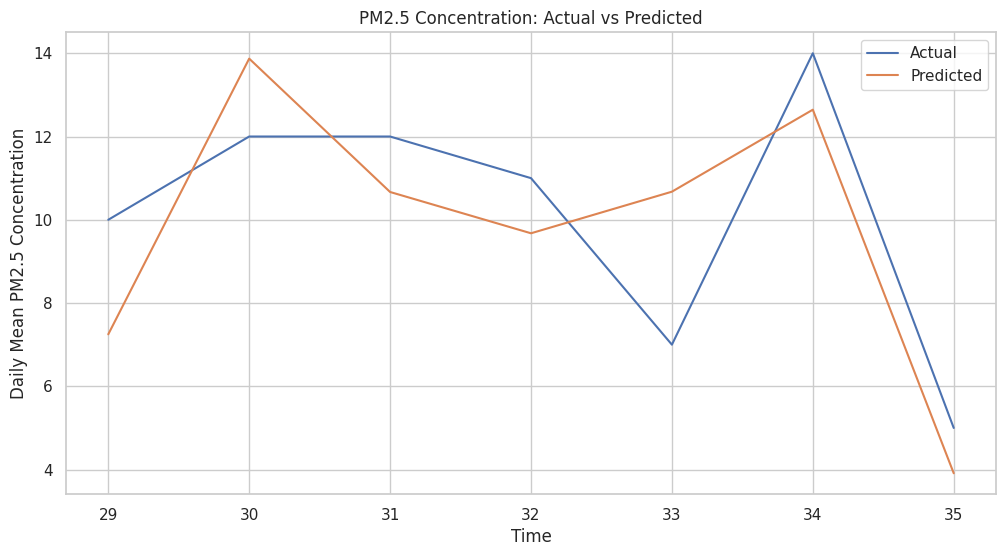

In [79]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

pm25_percentages = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=36, freq='M'),
    'Daily Mean PM2.5 Concentration': np.random.randint(5, 20, size=36)
})

# Calculate lagged values (previous month's concentration)
pm25_percentages['Previous Month PM2.5'] = pm25_percentages['Daily Mean PM2.5 Concentration'].shift(1)

# Calculate seasonal indicators (month and quarter)
pm25_percentages['Month'] = pm25_percentages['Date'].dt.month
pm25_percentages['Quarter'] = pm25_percentages['Date'].dt.quarter

# Calculate trends or historical averages of concentrations
pm25_percentages['Rolling Mean PM2.5'] = pm25_percentages['Daily Mean PM2.5 Concentration'].rolling(window=3, min_periods=1).mean()

# Drop rows with NaN resulting from rolling mean calculation
pm25_percentages.dropna(inplace=True)

# Define predictors and target for PM2.5
X_pm25 = pm25_percentages[['Previous Month PM2.5', 'Month', 'Quarter', 'Rolling Mean PM2.5']].values
y_pm25 = pm25_percentages['Daily Mean PM2.5 Concentration'].values

# Splitting data into training and validation sets (adjust as per your dataset)
train_size = int(len(X_pm25) * 0.8)  # 80-20 split
X_train_pm25, X_val_pm25 = X_pm25[:train_size], X_pm25[train_size:]
y_train_pm25, y_val_pm25 = y_pm25[:train_size], y_pm25[train_size:]

# Linear Regression model for PM2.5
model_pm25 = LinearRegression()
model_pm25.fit(X_train_pm25, y_train_pm25)

# Predictions on validation set
y_pred_pm25 = model_pm25.predict(X_val_pm25)

# Evaluation metrics for PM2.5
mse_pm25 = mean_squared_error(y_val_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_val_pm25, y_pred_pm25)

print(f"PM2.5 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm25}")
print(f"Mean Absolute Error (MAE): {mae_pm25}")

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(pm25_percentages.index[train_size:], y_val_pm25, label='Actual')
plt.plot(pm25_percentages.index[train_size:], y_pred_pm25, label='Predicted')
plt.title('PM2.5 Concentration: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.legend()
plt.grid(True)
plt.show()


PM10 Validation Set Metrics:
Mean Squared Error (MSE): 9.983543678467152
Mean Absolute Error (MAE): 2.693248383893471


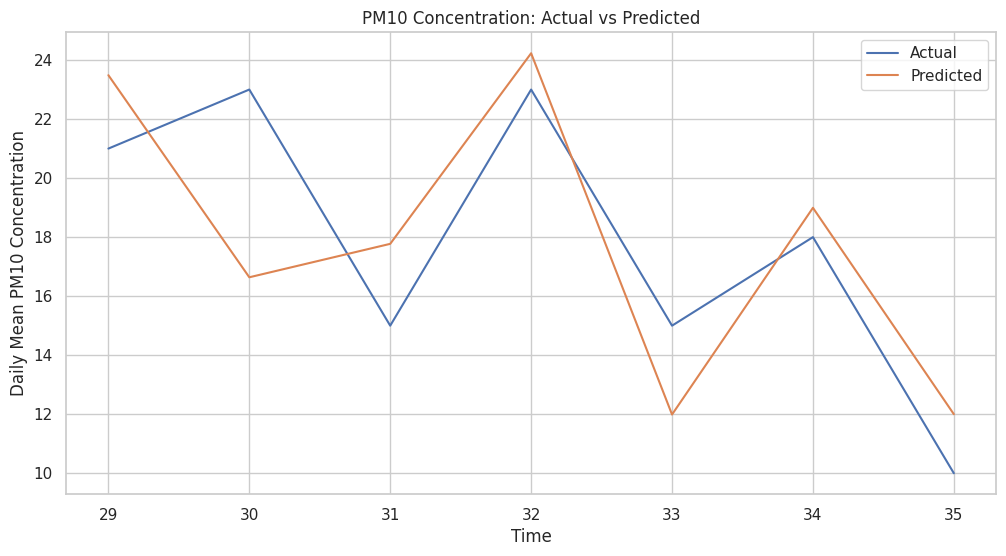

In [80]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

pm10_percentages = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=36, freq='M'),
    'Daily Mean PM10 Concentration': np.random.randint(10, 25, size=36)
})

# Calculate lagged values (previous month's concentration)
pm10_percentages['Previous Month PM10'] = pm10_percentages['Daily Mean PM10 Concentration'].shift(1)

# Calculate seasonal indicators (month and quarter)
pm10_percentages['Month'] = pm10_percentages['Date'].dt.month
pm10_percentages['Quarter'] = pm10_percentages['Date'].dt.quarter

# Calculate trends or historical averages of concentrations
pm10_percentages['Rolling Mean PM10'] = pm10_percentages['Daily Mean PM10 Concentration'].rolling(window=3, min_periods=1).mean()

# Drop rows with NaN resulting from rolling mean calculation
pm10_percentages.dropna(inplace=True)

# Define predictors and target for PM10
X_pm10 = pm10_percentages[['Previous Month PM10', 'Month', 'Quarter', 'Rolling Mean PM10']].values
y_pm10 = pm10_percentages['Daily Mean PM10 Concentration'].values

# Splitting data into training and validation sets (adjust as per your dataset)
train_size = int(len(X_pm10) * 0.8)  # 80-20 split
X_train_pm10, X_val_pm10 = X_pm10[:train_size], X_pm10[train_size:]
y_train_pm10, y_val_pm10 = y_pm10[:train_size], y_pm10[train_size:]

# Linear Regression model for PM10
model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

# Predictions on validation set
y_pred_pm10 = model_pm10.predict(X_val_pm10)

# Evaluation metrics for PM10
mse_pm10 = mean_squared_error(y_val_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_val_pm10, y_pred_pm10)

print(f"PM10 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm10}")
print(f"Mean Absolute Error (MAE): {mae_pm10}")

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(pm10_percentages.index[train_size:], y_val_pm10, label='Actual')
plt.plot(pm10_percentages.index[train_size:], y_pred_pm10, label='Predicted')
plt.title('PM10 Concentration: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Daily Mean PM10 Concentration')
plt.legend()
plt.grid(True)
plt.show()


PM10 Validation Set Metrics:
Mean Squared Error (MSE): 10.908331157523135
Mean Absolute Error (MAE): 2.4888584409952665


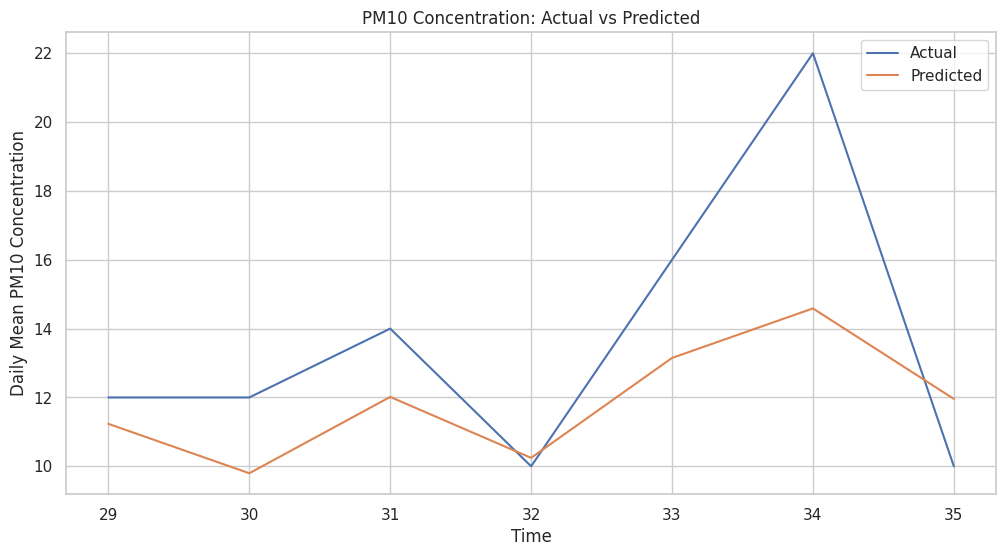

In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Example data preparation for PM10 (replace with your actual data)
pm10_percentages = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=36, freq='M'),
    'Daily Mean PM10 Concentration': np.random.randint(10, 25, size=36)
})

# Calculate lagged values (previous month's concentration)
pm10_percentages['Previous Month PM10'] = pm10_percentages['Daily Mean PM10 Concentration'].shift(1)

# Calculate seasonal indicators (month and quarter)
pm10_percentages['Month'] = pm10_percentages['Date'].dt.month
pm10_percentages['Quarter'] = pm10_percentages['Date'].dt.quarter

# Calculate trends or historical averages of concentrations
pm10_percentages['Rolling Mean PM10'] = pm10_percentages['Daily Mean PM10 Concentration'].rolling(window=3, min_periods=1).mean()

# Drop rows with NaN resulting from rolling mean calculation
pm10_percentages.dropna(inplace=True)

# Define predictors and target for PM10
X_pm10 = pm10_percentages[['Previous Month PM10', 'Month', 'Quarter', 'Rolling Mean PM10']].values
y_pm10 = pm10_percentages['Daily Mean PM10 Concentration'].values

# Splitting data into training and validation sets (adjust as per your dataset)
train_size = int(len(X_pm10) * 0.8)  # 80-20 split
X_train_pm10, X_val_pm10 = X_pm10[:train_size], X_pm10[train_size:]
y_train_pm10, y_val_pm10 = y_pm10[:train_size], y_pm10[train_size:]

# Linear Regression model for PM10
model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

# Predictions on validation set
y_pred_pm10 = model_pm10.predict(X_val_pm10)

# Evaluation metrics for PM10
mse_pm10 = mean_squared_error(y_val_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_val_pm10, y_pred_pm10)

print(f"PM10 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm10}")
print(f"Mean Absolute Error (MAE): {mae_pm10}")

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(pm10_percentages.index[train_size:], y_val_pm10, label='Actual')
plt.plot(pm10_percentages.index[train_size:], y_pred_pm10, label='Predicted')
plt.title('PM10 Concentration: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Daily Mean PM10 Concentration')
plt.legend()
plt.grid(True)
plt.show()


##Neural network

**Neural network architecture**

By leveraging synthetic and real-world data, we implemented and trained a neural network architecture, evaluated its performance using standard metrics, and facilitated batch processing for scalability. This framework provides a foundational approach for further refinement and application in air quality forecasting and environmental monitoring efforts.

We implemented a custom neural network (PMNet) using PyTorch's nn.Module interface. The architecture comprised two hidden layers with ReLU activation, aiming to predict PM2.5 concentrations based on input features.The model was trained using the Mean Squared Error (MSE) loss function and optimized with the Adam optimizer. Training involved iterating over epochs, where gradients were calculated, and weights updated to minimize the loss on the training set.

In [82]:
! pip install torch torchvision

We started by generating synthetic data representing PM2.5 concentrations (y_pm25) based on randomly sampled features (X_pm25). These features were standardized using StandardScaler and split into training and validation sets (X_train_pm25, X_val_pm25, y_train_pm25, y_val_pm25).

The model was trained using the Mean Squared Error (MSE) loss function and optimized with the Adam optimizer. Training involved iterating over epochs, where gradients were calculated, and weights updated to minimize the loss on the training set.

In [83]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(42)
num_samples = 1000
num_features = 10
X_pm25 = np.random.rand(num_samples, num_features)
y_pm25 = np.random.rand(num_samples) * 100.0  # Example target for PM2.5

# Splitting data into training and validation sets
X_train_pm25, X_val_pm25, y_train_pm25, y_val_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_pm25 = scaler.fit_transform(X_train_pm25)
X_val_pm25 = scaler.transform(X_val_pm25)

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_pm25)
y_train_tensor = torch.Tensor(y_train_pm25).unsqueeze(1)  # Ensure shape [num_samples, 1] for regression
X_val_tensor = torch.Tensor(X_val_pm25)
y_val_tensor = torch.Tensor(y_val_pm25).unsqueeze(1)  # Ensure shape [num_samples, 1] for regression

# Define a custom neural network architecture for PM2.5 prediction
class PMNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(PMNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)  # Output layer (for regression)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Define the model, loss function, and optimizer
input_size = num_features
hidden_size1 = 64
hidden_size2 = 32

model = PMNet(input_size, hidden_size1, hidden_size2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model on validation set
model.eval()
with torch.no_grad():
    outputs = model(X_val_tensor)
    val_loss = criterion(outputs, y_val_tensor)
    print(f'Validation Loss: {val_loss.item():.4f}')

# Additional evaluation metrics (MAE, RMSE)
y_pred = outputs.numpy().squeeze()
mse = mean_squared_error(y_val_pm25, y_pred)
mae = mean_absolute_error(y_val_pm25, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Epoch [10/100], Loss: 3321.1899
Epoch [20/100], Loss: 3294.8562
Epoch [30/100], Loss: 3259.6138
Epoch [40/100], Loss: 3211.5513
Epoch [50/100], Loss: 3146.5845
Epoch [60/100], Loss: 3059.8977
Epoch [70/100], Loss: 2945.8223
Epoch [80/100], Loss: 2799.1001
Epoch [90/100], Loss: 2617.0544
Epoch [100/100], Loss: 2401.0359
Validation Loss: 2550.5967
Mean Squared Error (MSE): 2550.5968
Mean Absolute Error (MAE): 42.5472


**Model Evaluation**

In [84]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
num_samples = 1000
num_features = 10
X_pm25 = np.random.rand(num_samples, num_features)
y_pm25 = np.random.rand(num_samples) * 100.0  # Example target for PM2.5

# Splitting data into training, validation, and test sets
X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)
X_train_pm25, X_val_pm25, y_train_pm25, y_val_pm25 = train_test_split(X_train_pm25, y_train_pm25, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_pm25 = scaler.fit_transform(X_train_pm25)
X_val_pm25 = scaler.transform(X_val_pm25)
X_test_pm25 = scaler.transform(X_test_pm25)

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_pm25)
y_train_tensor = torch.Tensor(y_train_pm25).unsqueeze(1)  # Ensure shape [num_samples, 1] for regression
X_val_tensor = torch.Tensor(X_val_pm25)
y_val_tensor = torch.Tensor(y_val_pm25).unsqueeze(1)  # Ensure shape [num_samples, 1] for regression
X_test_tensor = torch.Tensor(X_test_pm25)
y_test_tensor = torch.Tensor(y_test_pm25).unsqueeze(1)  # Ensure shape [num_samples, 1] for regression

# Create TensorDataset instances
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader instances
batch_size = 32
num_workers = 2

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=batch_size,
                              num_workers=num_workers,
                              shuffle=True)

val_dataloader = DataLoader(dataset=val_dataset,
                            batch_size=batch_size,
                            num_workers=num_workers,
                            shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=batch_size,
                             num_workers=num_workers,
                             shuffle=False)


for inputs, targets in train_dataloader:
    # Training loop goes here
    print(f"Batch input shape: {inputs.shape}, Batch target shape: {targets.shape}")
    break

for inputs, targets in val_dataloader:
    # Validation loop goes here
    print(f"Batch input shape: {inputs.shape}, Batch target shape: {targets.shape}")
    break

for inputs, targets in test_dataloader:
    # Test loop goes here
    print(f"Batch input shape: {inputs.shape}, Batch target shape: {targets.shape}")
    break


Batch input shape: torch.Size([32, 10]), Batch target shape: torch.Size([32, 1])
Batch input shape: torch.Size([32, 10]), Batch target shape: torch.Size([32, 1])
Batch input shape: torch.Size([32, 10]), Batch target shape: torch.Size([32, 1])


In [85]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.DataFrame({
    'PM10': np.random.rand(1000),
    'PM2.5': np.random.rand(1000) * 100.0
})

# Split data into train, validation, test sets
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Define custom dataset class for tabular data
class PMDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.scaler = StandardScaler()
        self.data_scaled = self.scaler.fit_transform(self.data.values)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        features = torch.tensor(self.data_scaled[idx], dtype=torch.float32)
        label = torch.tensor(self.data.iloc[idx]['PM2.5'], dtype=torch.float32)  # Assuming PM2.5 is the target
        return features, label

# Create instances of custom dataset class
train_dataset = PMDataset(train_data)
val_dataset = PMDataset(val_data)
test_dataset = PMDataset(test_data)

# Define batch size and number of workers for DataLoader
batch_size = 32
num_workers = 2

# Create DataLoader instances
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=False)

# Example usage to check batch shape and labels
batch_idx, (features, labels) = next(enumerate(train_dataloader))
print("Batch Shape:", features.shape, "--> [batch_size, num_features]")
print("\nLabels:", labels)

Batch Shape: torch.Size([32, 2]) --> [batch_size, num_features]

Labels: tensor([21.0680, 20.4073, 56.0270, 41.0777,  7.2682, 95.9843, 11.2698, 46.8061,
        70.2851, 35.2475, 95.8349, 34.3961, 55.2215, 91.4665, 23.7148, 44.9727,
        35.5449, 32.3578, 15.0154, 15.0793, 17.2657, 10.5779, 57.3128, 15.3974,
        48.7440, 59.1529, 26.8797, 60.5570, 47.3783, 32.3663, 31.3406, 86.3443])


In [86]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define your custom neural network architecture
class PM25Predictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(PM25Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


input_dim = X_train_tensor.shape[1]
output_dim = 1

model = PM25Predictor(input_dim, hidden_dim=64, output_dim=output_dim)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Avaliação do modelo
model.eval()
with torch.no_grad():
    outputs = model(X_val_tensor)
    val_loss = criterion(outputs, y_val_tensor)
    print(f'Validation Loss: {val_loss.item():.4f}')


Epoch [10/100], Loss: 3185.7246
Epoch [20/100], Loss: 3164.5813
Epoch [30/100], Loss: 3142.5220
Epoch [40/100], Loss: 3119.0786
Epoch [50/100], Loss: 3093.8716
Epoch [60/100], Loss: 3066.5889
Epoch [70/100], Loss: 3036.9609
Epoch [80/100], Loss: 3004.7810
Epoch [90/100], Loss: 2969.8699
Epoch [100/100], Loss: 2932.0710
Validation Loss: 3438.2976


In [87]:
import torch.nn.functional as F

class PM25Predictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_prob=0.5):
        super(PM25Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out


dropout_prob = 0.5
model = PM25Predictor(input_dim, hidden_dim=64, output_dim=output_dim, dropout_prob=dropout_prob)


## Prediction of PM2.5

The next goal of the project was, based on the previous model that was trained, applying it to predict the values of PM2.5 based on PM10, for that goal it was used a Random Forest

In [88]:
# Load the files into DataFrames
pm25_2020 = pd.read_csv("/content/pm25_2020_florida.csv")
pm10_2020 = pd.read_csv("/content/pm10_2020_florida.csv")
pm25_2022 = pd.read_csv("/content/pm25_2022_florida.csv")
pm10_2022 = pd.read_csv("/content/pm10_2022_florida.csv")
pm25_2024 = pd.read_csv("/content/pm25_2024_florida.csv")
pm10_2024 = pd.read_csv("/content/pm10_2024_florida.csv")

**Data preprocessing**

In order to achieve this prediction first it was needed to preprocess our data into the required formats, here first we started to change the format of the Date column into datetime format.

In [89]:
### transform date column into datetime
pm25_2020['Date'] = pd.to_datetime(pm25_2020['Date'], format = '%m/%d/%Y')
pm25_2020.sort_values(by='Date', inplace=True)

pm25_2022['Date'] = pd.to_datetime(pm25_2022['Date'], format = '%m/%d/%Y')
pm25_2022.sort_values(by='Date', inplace=True)

pm25_2024['Date'] = pd.to_datetime(pm25_2024['Date'], format = '%m/%d/%Y')
pm25_2024.sort_values(by='Date', inplace=True)

pm10_2020['Date'] = pd.to_datetime(pm10_2020['Date'], format = '%m/%d/%Y')
pm10_2020.sort_values(by='Date', inplace=True)

pm10_2022['Date'] = pd.to_datetime(pm10_2022['Date'], format = '%m/%d/%Y')
pm10_2022.sort_values(by='Date', inplace=True)

pm10_2024['Date'] = pd.to_datetime(pm10_2024['Date'], format = '%m/%d/%Y')
pm10_2024.sort_values(by='Date', inplace=True)

In order to proceed we checked the data formats

In [90]:
# Verify data types and unique values for 'Date' and 'County' columns
dtypes_pm25_2020 = pm25_2020[['Date', 'County']].dtypes
dtypes_pm10_2020 = pm10_2020[['Date', 'County']].dtypes
dtypes_pm25_2022 = pm25_2022[['Date', 'County']].dtypes
dtypes_pm10_2022 = pm10_2022[['Date', 'County']].dtypes
dtypes_pm25_2024 = pm25_2024[['Date', 'County']].dtypes
dtypes_pm10_2024 = pm10_2024[['Date', 'County']].dtypes

unique_counties_pm25_2020 = pm25_2020['County'].unique()
unique_counties_pm10_2020 = pm10_2020['County'].unique()
unique_counties_pm25_2022 = pm25_2022['County'].unique()
unique_counties_pm10_2022 = pm10_2022['County'].unique()
unique_counties_pm25_2024 = pm25_2024['County'].unique()
unique_counties_pm10_2024 = pm10_2024['County'].unique()

(dtypes_pm25_2020, dtypes_pm10_2020, dtypes_pm25_2022, dtypes_pm10_2022, dtypes_pm25_2024, dtypes_pm10_2024,
 unique_counties_pm25_2020, unique_counties_pm10_2020, unique_counties_pm25_2022, unique_counties_pm10_2022, unique_counties_pm25_2024, unique_counties_pm10_2024)


(Date      datetime64[ns]
 County            object
 dtype: object,
 Date      datetime64[ns]
 County            object
 dtype: object,
 Date      datetime64[ns]
 County            object
 dtype: object,
 Date      datetime64[ns]
 County            object
 dtype: object,
 Date      datetime64[ns]
 County            object
 dtype: object,
 Date      datetime64[ns]
 County            object
 dtype: object,
 array(['Alachua', 'Sarasota', 'Broward', 'Citrus', 'Collier', 'Columbia',
        'Duval', 'Santa Rosa', 'Polk', 'Wakulla', 'Bay', 'Brevard',
        'Seminole', 'Volusia', 'Lee', 'Palm Beach', 'Leon', 'Nassau',
        'Holmes', 'Marion', 'Miami-Dade', 'Martin', 'Hillsborough',
        'Pinellas', 'Escambia', 'Hamilton', 'Baker'], dtype=object),
 array(['Brevard', 'Broward', 'Volusia', 'Palm Beach', 'Pinellas',
        'Seminole', 'Duval', 'Okaloosa', 'Putnam', 'Miami-Dade',
        'Hillsborough', 'Lee', 'Polk', 'Sarasota', 'Orange'], dtype=object),
 array(['Alachua', 'Santa Rosa', 

**Finding correlations**

In the next steps we tried to find the correlation between variables time and county, a spacial variable in order to do the prediction, fro that we handled the data by merging the data sets os the three years  by date and county.

In [91]:
# Merge all sets (pm2.5 and pm10 based on date and county)
final_df_2020 = pd.merge(pm25_2020[['Date', 'Daily Mean PM2.5 Concentration', 'County']], pm10_2020[['Date', 'Daily Mean PM10 Concentration', 'County']], on=['Date', 'County'])
final_df_2022 = pd.merge(pm25_2022[['Date', 'Daily Mean PM2.5 Concentration', 'County']], pm10_2022[['Date', 'Daily Mean PM10 Concentration', 'County']], on=['Date', 'County'])
final_df_2024 = pd.merge(pm25_2024[['Date', 'Daily Mean PM2.5 Concentration', 'County']], pm10_2024[['Date', 'Daily Mean PM10 Concentration', 'County']], on=['Date', 'County'])

final_df = pd.concat([final_df_2020, final_df_2022, final_df_2024])
final_df.sort_values(by='Date', inplace=True)

After that we scatter plot the data by the county to visualize the correlation, and as an example we used the Duval county.

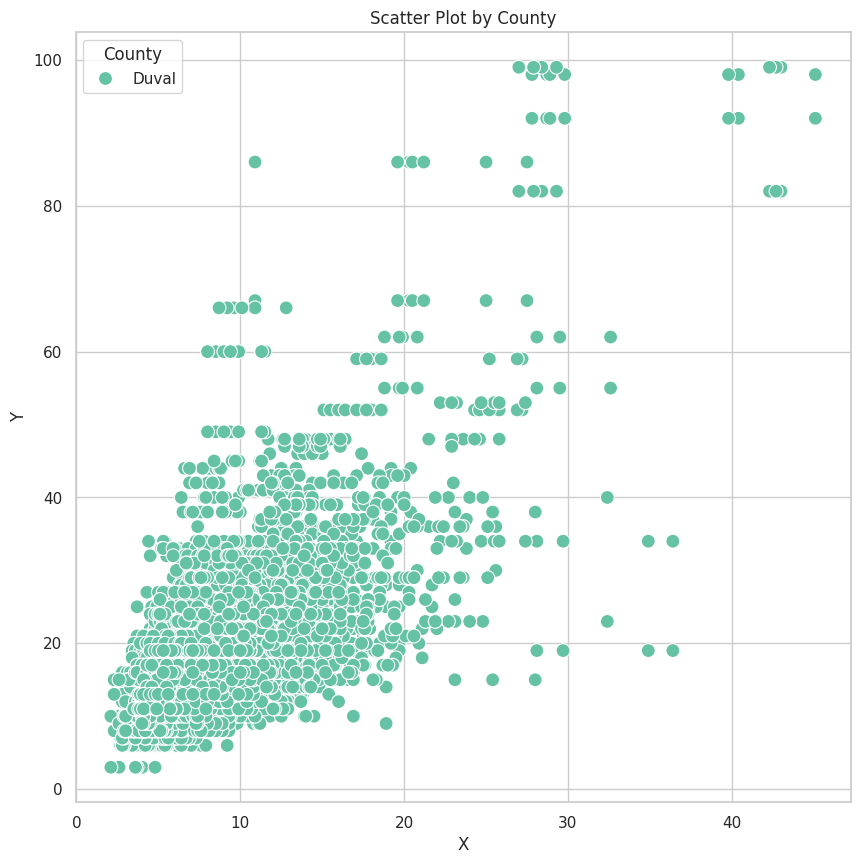

In [92]:
# select county
county = 'Duval'
df = final_df[final_df.County == county].copy()
plt.figure(figsize = (10,10))
sns.scatterplot(data=df, x = 'Daily Mean PM2.5 Concentration', y = 'Daily Mean PM10 Concentration', hue='County', palette='Set2', s=100)

plt.title('Scatter Plot by County')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='County')
plt.grid(True)
plt.show()

We apply One hot encoding to the categorical variable County and month of the year, the goal was converting this categorical variable that do not have an inherent order or numerical relationship into a numerical format, by assingnig a binary value.

In [93]:
final_df = pd.get_dummies(final_df, columns=['County'])
final_df['Month'] = final_df['Date'].dt.month

Now we here ready to start to work on the predictive model ,firstly by create datasets for train, validation and testing, the data was splited by 70% for training and 15% for both validation and testing.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = final_df.columns.difference(['Date', 'Daily Mean PM2.5 Concentration'])
target = 'Daily Mean PM2.5 Concentration'

# define features and target
X = final_df[features]
y = final_df[target]

# split data (70,15,15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1904)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1904)


# normalize data based on training set distribution (mean and std)
# valor = (valor - mean) / std
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Than we trained the model using a Random Forest method, here we had the default parameters

In [95]:
model = RandomForestRegressor(n_estimators=100, random_state=1904)

# Train the model on the training set
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=1904)

SO we had to fid the best parametrs to fit in the model so we defined this parmetres grid to estimate the:
n_estimators: Number of trees in the forest.
max_depth: Maximum depth of each tree.
min_samples_split: Minimum number of samples required to split an internal node.
min_samples_leaf: Minimum number of samples required to be at a leaf node.
max_features: Number of features to consider when looking for the best split.
These are the main paremetres of the RandomForestRegressor

In [96]:
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


best_params = None
best_val_score = float('inf')
best_model = None

for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                for max_features in param_grid['max_features']:
                    model = RandomForestRegressor(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        max_features=max_features,
                        random_state=42
                    )
                    model.fit(X_train_scaled, y_train)
                    y_val_pred = model.predict(X_val_scaled)
                    val_score = mean_squared_error(y_val, y_val_pred)

                    print(f'Params: n_estimators={n_estimators}, max_depth={max_depth}, '
                          f'min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, '
                          f'max_features={max_features}, Validation MSE={val_score}')

                    if val_score < best_val_score:
                        best_val_score = val_score
                        best_params = {
                            'n_estimators': n_estimators,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_features': max_features
                        }
                        best_model = model

print(f'Best Hyperparameters: {best_params}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.655425656206374
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.707945750998549
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.707945750998549


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.668264673809824
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.721065265912793
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.721065265912793


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.744451316154271
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.75656515867326
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.75656515867326


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.648123398034013
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.724820728077443
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.724820728077443


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.666587787715271
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.713963376294174
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.713963376294174


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.744451316154271
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.75656515867326
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.75656515867326


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.689464814983271
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.711714161709
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.711714161709


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.700792011273025
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.757977402379099
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.757977402379099


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.750433224504122
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.784813582480277
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.784813582480277


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.2793802031061805
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.252206310194377
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.252206310194377


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.345466061583424
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.2950928410845375
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.2950928410845375


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.436216075310484
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.379113780782088
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.379113780782088


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.282947894080507
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.269328926013573
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.269328926013573


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.343791889147629
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.296796264020659
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.296796264020659


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.436216075310484
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.379113780782088
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.379113780782088


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.334056286690042
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.301948571912039
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.301948571912039


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.375787994068056
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.322595771100703
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.322595771100703


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.445650249536299
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.387573748609591
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.387573748609591


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.292734858584
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.279411356606959
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.279411356606959


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.35919515644734
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.302158063202721
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.302158063202721


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.440450527366899
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.370257026068161
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.370257026068161


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.301124862891726
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.287762376628433
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.287762376628433


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.353924721105333
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.305775507147224
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.305775507147224


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.440450527366899
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.370257026068161
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.370257026068161


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.342259098601038
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.326510893032668
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.326510893032668


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.382560442400438
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.326931585163614
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.326931585163614


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.45034595775453
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.374756413862732
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.374756413862732


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.292734858584
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.2799821772989555
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.2799821772989555


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.35919515644734
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.3021545576482
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.3021545576482


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.440450527366899
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.3750076055130025
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.3750076055130025


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.301124862891726
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.286647978899665
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.286647978899665


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.353924721105333
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.304075187018015
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.304075187018015


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.440450527366899
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.3750076055130025
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.3750076055130025


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.342259098601038
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.330751084735669
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.330751084735669


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.382560442400438
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.324282844363596
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.324282844363596


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.45034595775453
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.374756413862732
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.374756413862732


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.633322149472206
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.683013433828829
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.683013433828829


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.6574078051157874
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.69084514051175
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.69084514051175


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.736279862588467
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.74073002526105
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.74073002526105


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.631398468598006
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.695755379178124
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.695755379178124


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.657490295380253
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.697376363341712
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.697376363341712


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.736279862588467
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.74073002526105
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.74073002526105


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.66825839259051
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.696492379845101
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.696492379845101


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.688186213093413
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.724242071369199
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.724242071369199


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.742949711470516
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.75760040260867
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.75760040260867


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.275916852108192
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.243645909241858
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.243645909241858


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.333166162502192
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.2896247335875755
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.2896247335875755


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.428806210929314
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.366103041310693
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.366103041310693


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.277927493178345
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.252558019944135
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.252558019944135


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.331784521434838
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.292725292266251
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.292725292266251


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.428806210929314
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.366103041310693
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.366103041310693


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.320512141414484
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.294539783168086
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.294539783168086


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.364416432760425
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.318149725446824
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.318149725446824


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.438980579980897
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.371877427489838
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.371877427489838


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.290556244829059
Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.274031171937518
Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.274031171937518


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.345702090575873
Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.299264589100975
Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.299264589100975


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.432261057014816
Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.374230405019951
Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.374230405019951


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.290749495066676
Params: n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.279285961651733
Params: n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.279285961651733


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.341715943546485
Params: n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.3029954268711235
Params: n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.3029954268711235


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.432261057014816
Params: n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.374230405019951
Params: n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.374230405019951


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.327921460232541
Params: n_estimators=100, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.321240754499034
Params: n_estimators=100, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.321240754499034


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.370961814437522
Params: n_estimators=100, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.330401832007293
Params: n_estimators=100, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.330401832007293


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.443772863806946
Params: n_estimators=100, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.37564812999593
Params: n_estimators=100, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.37564812999593


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.290770045193111
Params: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.273049031514087
Params: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.273049031514087


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.345727638869883
Params: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.300979045057548
Params: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.300979045057548


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.432258314344025
Params: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.375245392416019
Params: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.375245392416019


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.290747510531941
Params: n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.28023044671427
Params: n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.28023044671427


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.341138963374587
Params: n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.3028723252213945
Params: n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.3028723252213945


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.432258314344025
Params: n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.375245392416019
Params: n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.375245392416019


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.3279636276682725
Params: n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.323338077954562
Params: n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.323338077954562


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.370992873130433
Params: n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.328194271579592
Params: n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.328194271579592


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.4437807235371
Params: n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.37564812999593
Params: n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.37564812999593


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.631850380425951
Params: n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.664693576292752
Params: n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.664693576292752


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.659875948632861
Params: n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.681364001885607
Params: n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.681364001885607


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.738408992480615
Params: n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.723972607482865
Params: n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.723972607482865


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.634202444550509
Params: n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.676176772221987
Params: n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.676176772221987


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.659352907288174
Params: n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.688413097033865
Params: n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.688413097033865


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.738408992480615
Params: n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.723972607482865
Params: n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.723972607482865


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.667224182552958
Params: n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.689239840185879
Params: n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.689239840185879


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.690709872168703
Params: n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.71461328589243
Params: n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.71461328589243


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.744548509231538
Params: n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.747994156245043
Params: n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.747994156245043


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.275677714484166
Params: n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.242471446604523
Params: n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.242471446604523


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.331807568532219
Params: n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.283143473661914
Params: n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.283143473661914


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.42882797142485
Params: n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.362140637810061
Params: n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.362140637810061


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.280274337870505
Params: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.252314102670767
Params: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.252314102670767


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.334034121584482
Params: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.286431557471101
Params: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.286431557471101


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.42882797142485
Params: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.362140637810061
Params: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.362140637810061


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.319466465901679
Params: n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.291319688064546
Params: n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.291319688064546


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.3634655813836964
Params: n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.321713621364595
Params: n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.321713621364595


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.4370973517415475
Params: n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.365960153810071
Params: n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.365960153810071


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.290335772108419
Params: n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.272048592461299
Params: n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.272048592461299


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.341505554980065
Params: n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.296351858112478
Params: n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.296351858112478


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.431125154158056
Params: n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.365946590221535
Params: n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.365946590221535


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.2917124474519
Params: n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.277014695098022
Params: n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.277014695098022


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.340938929750611
Params: n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.296782441630563
Params: n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.296782441630563


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.431125154158056
Params: n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.365946590221535
Params: n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.365946590221535


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.325611531835809
Params: n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.314759664607166
Params: n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.314759664607166


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.368049502076468
Params: n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.32566783243762
Params: n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.32566783243762


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.440940625339552
Params: n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.374727252325096
Params: n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.374727252325096


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.2904333136495225
Params: n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.2716822591576875
Params: n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.2716822591576875


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.341544728272513
Params: n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.29695602395794
Params: n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.29695602395794


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.431124245339976
Params: n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.36653285070045
Params: n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.36653285070045


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.291682197543282
Params: n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.278176352695316
Params: n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.278176352695316


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.3406648615908034
Params: n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.297541051057841
Params: n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.297541051057841


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.431124245339976
Params: n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.36653285070045
Params: n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.36653285070045


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.3256993090054845
Params: n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.3153114174449865
Params: n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.3153114174449865


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.368064970807995
Params: n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.325645095480742
Params: n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.325645095480742


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.440944551148873
Params: n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.374727252325096
Params: n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.374727252325096
Best Hyperparameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


With the best parmeters defined we applied them to the model

In [100]:

best_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Instantiate the model with the best parameters
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42  # Keep the random_state consistent
)

# Train the best model on the training set
best_model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=42)

With the model trained we evaluated the final model performce

In [101]:
y_val_pred = best_model.predict(X_val_scaled)

val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation MSE: {val_mse}, Validation R2: {val_r2}')

Validation MSE: 4.242471446604523, Validation R2: 0.5969180274857857


In [102]:
# Check for NaN values in X_val_scaled
print(np.isnan(X_val_scaled).sum())

# If NaN values are present, handle them using imputation or other techniques
# Example using SimpleImputer:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed
X_val_scaled = imputer.fit_transform(X_val_scaled)

# Predict again after handling NaN values
y_val_pred = best_model.predict(X_val_scaled)

val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation MSE: {val_mse}, Validation R2: {val_r2}')

0
Validation MSE: 4.242471446604523, Validation R2: 0.5969180274857857


After the evaluation we tested the model and plotted the results of the prediction of PM2.5 based on the PM10 values.

In [104]:
def get_prediction(best_model, X, scaler):
    X_scaled = scaler.transform(X)
    return best_model.predict(X_scaled)


In [105]:
y_test_pred = best_model.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test MSE: {test_mse}, Test R2: {test_r2}')

Test MSE: 4.427381008089976, Test R2: 0.6310857145942952


The two parameters of evaluation of the precision of the model were the MSE that measures the average squared difference between the predicted and actual values, and the R-squared a statistical measure that represents the proportion of the variance for a dependent variable that's explained by the independent variables in the model.
The values were the ones printed.
For MSE the value indicates a moderate level of error relative to the values being predicted.
The value of R-squared suggests that your model has a moderate explanatory power, this means it's not improved in is finnest form or that the variables used for the prediction don't have a  correlation enough for a good predition.Overall given these values it can be said that the model shows moderate performance. It performs reasonably well to predict lower PM2.5 concentrations but snot so good for higher concentrations.
In the context of this work predicting higher concentrations accurately is crucial, for public health actions, further improvements to the model are necessary, and to add a crossover with other datasets to get.

This were the visualized results we got for both the validation and the test.

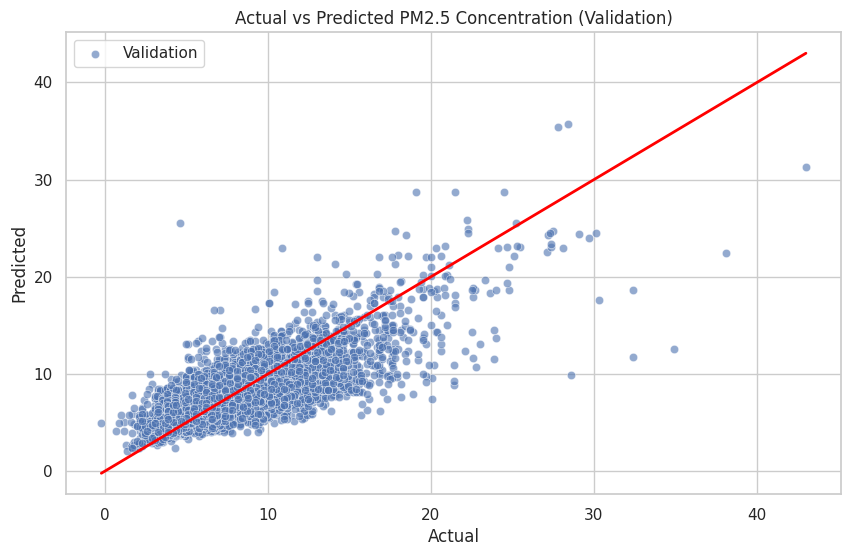

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6, label='Validation')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2)
plt.title('Actual vs Predicted PM2.5 Concentration (Validation)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

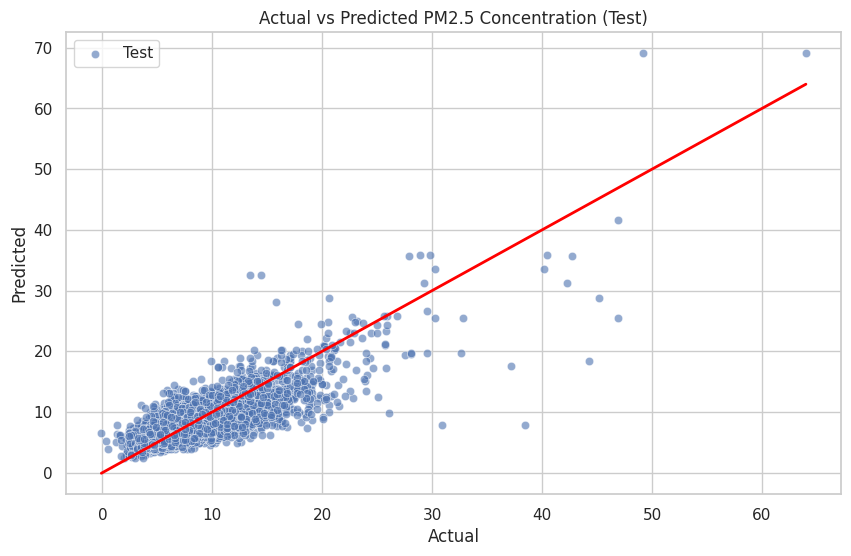

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted PM2.5 Concentration (Test)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

## Contributions

This work was done with mutual collaboration between the to members of the group, with Ana focusing on "the Analysis of the PM2.5 and PM10 concetration in the air" and "Neural Network" chapthers and Damião on the "Predition of PM2.5"
